In [47]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score,accuracy_score,classification_report

# Load dataset

In [48]:
df=pd.read_csv(r'C:\Users\Divya\Downloads\gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [50]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

# encode the categorical variable

In [51]:
# encodes the gender columns as (1,0)
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])


# encoder through pandas
# df['gender']=df['gender'].replace({'male':1,'Female':0})

In [52]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


# normalize the independent variables

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['forehead_width_cm','forehead_height_cm']]=scaler.fit_transform(df[['forehead_width_cm','forehead_height_cm']])

In [54]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.247933,0.283971,1,0,1,1,1
1,0,0.739389,-1.009418,0,0,1,0,0
2,0,-1.247933,0.653511,1,1,1,1,1
3,0,1.100720,0.283971,0,1,1,1,1
4,1,0.287725,-0.085568,0,0,0,0,0


In [55]:
df['forehead_height_cm'].mean()

2.6711064651649437e-16

In [56]:
df['forehead_height_cm'].std()

1.0000999950005007

# split the dataset

In [57]:
X=df.drop('gender',axis=1)
y=df['gender']

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Logistic regression

In [59]:
logistics_reg=LogisticRegression()
logistics_reg.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred=logistics_reg.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.962037962037962
Confusion Matrix:
 [[469  20]
 [ 18 494]]
Precision: 0.9610894941634242
Recall: 0.96484375


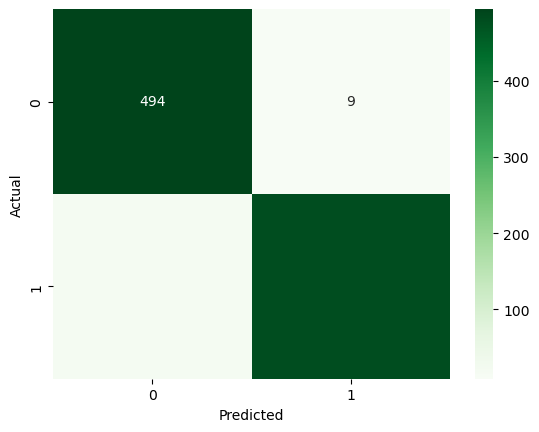

In [44]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KNN ALGORITHM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv(r'C:\Users\Divya\Downloads\gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
category_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [12]:
numerical_columns

['long_hair',
 'forehead_width_cm',
 'forehead_height_cm',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long']

In [4]:
oe = OrdinalEncoder()
df[category_columns] = oe.fit_transform(df[category_columns])

In [13]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [7]:
target_column = "gender" 
le = LabelEncoder()
df[target_column] = le.fit_transform(df[target_column])

In [14]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [8]:
X = df.drop(target_column, axis=1)
y = df[target_column]

In [10]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [11]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
X_test

array([[ 0.38484494,  0.01566934, -0.46023087, ...,  0.98708341,
         1.01867434,  0.9965061 ],
       [ 0.38484494,  0.4659376 ,  0.09393032, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [-2.59844915, -0.25449162, -1.19911246, ..., -1.01308561,
        -0.981668  ,  0.9965061 ],
       ...,
       [ 0.38484494,  1.00625952, -0.46023087, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [ 0.38484494,  0.64604491,  0.64809151, ...,  0.98708341,
         1.01867434,  0.9965061 ],
       [ 0.38484494, -0.16443797, -1.01439206, ...,  0.98708341,
        -0.981668  ,  0.9965061 ]])

In [18]:
X_train

array([[ 0.38484494,  1.99684971,  1.2022527 , ...,  0.98708341,
         1.01867434,  0.9965061 ],
       [ 0.38484494, -0.8848672 , -1.38383285, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [-2.59844915, -1.51524277, -0.27551047, ..., -1.01308561,
        -0.981668  , -1.00350615],
       ...,
       [ 0.38484494, -1.06497451, -0.09079008, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [ 0.38484494, -0.34454528, -1.01439206, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [ 0.38484494, -1.60529643, -0.82967166, ..., -1.01308561,
        -0.981668  , -1.00350615]])

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn_model.predict(X_test)

In [22]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.9590409590409591


In [24]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       502
           1       0.97      0.94      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [25]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[489  13]
 [ 28 471]]
